In [12]:
from pynq import Overlay
ol = Overlay("system.bit")

In [13]:

from pynq.lib.video import *

hdmi_in = ol.video.hdmi_in
hdmi_out = ol.video.hdmi_out
hdmi_in.configure(PIXEL_RGB)
hdmi_out.configure(hdmi_in.mode, PIXEL_RGB)
hdmi_in.start()
hdmi_out.start()

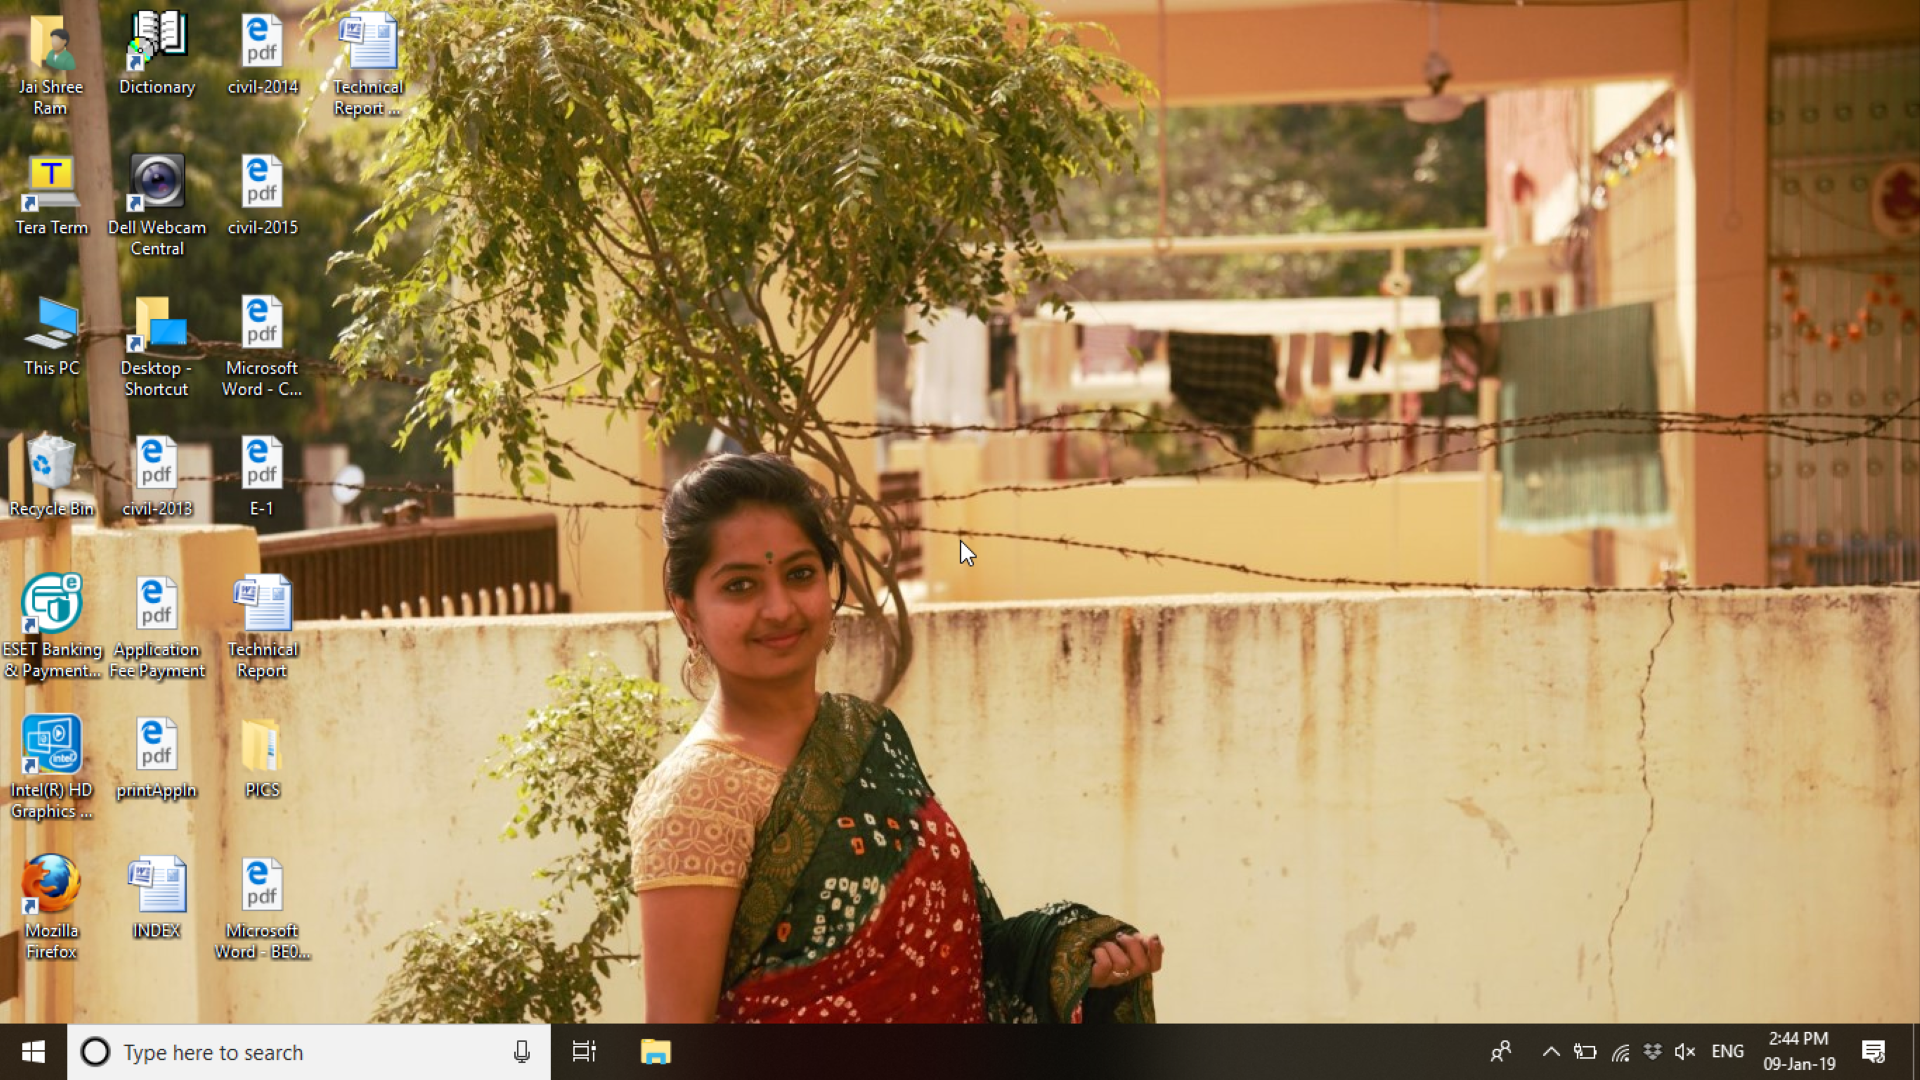

In [14]:
import PIL.Image
frame = hdmi_in.readframe()
img = PIL.Image.fromarray(frame)
img.save("/home/xilinx/jupyter_notebooks/base/video/data/opencv_filters.jpg")

img

In [15]:
import time
import cv2
import numpy as np
import time
numframes = 10
grayscale = np.ndarray(shape=(hdmi_in.mode.height, 
                              hdmi_in.mode.width), dtype=np.uint8)
result = np.ndarray(shape=(hdmi_in.mode.height, 
                           hdmi_in.mode.width), dtype=np.uint8)

start = time.time()

for _ in range(numframes):
    inframe = hdmi_in.readframe()
    cv2.cvtColor(inframe,cv2.COLOR_RGB2GRAY,dst=grayscale)
    inframe.freebuffer()
    cv2.Laplacian(grayscale, cv2.CV_8U, dst=result)

    outframe = hdmi_out.newframe()
    cv2.cvtColor(result, cv2.COLOR_GRAY2RGB,dst=outframe)
    hdmi_out.writeframe(outframe)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Frames per second:  3.873234546230916


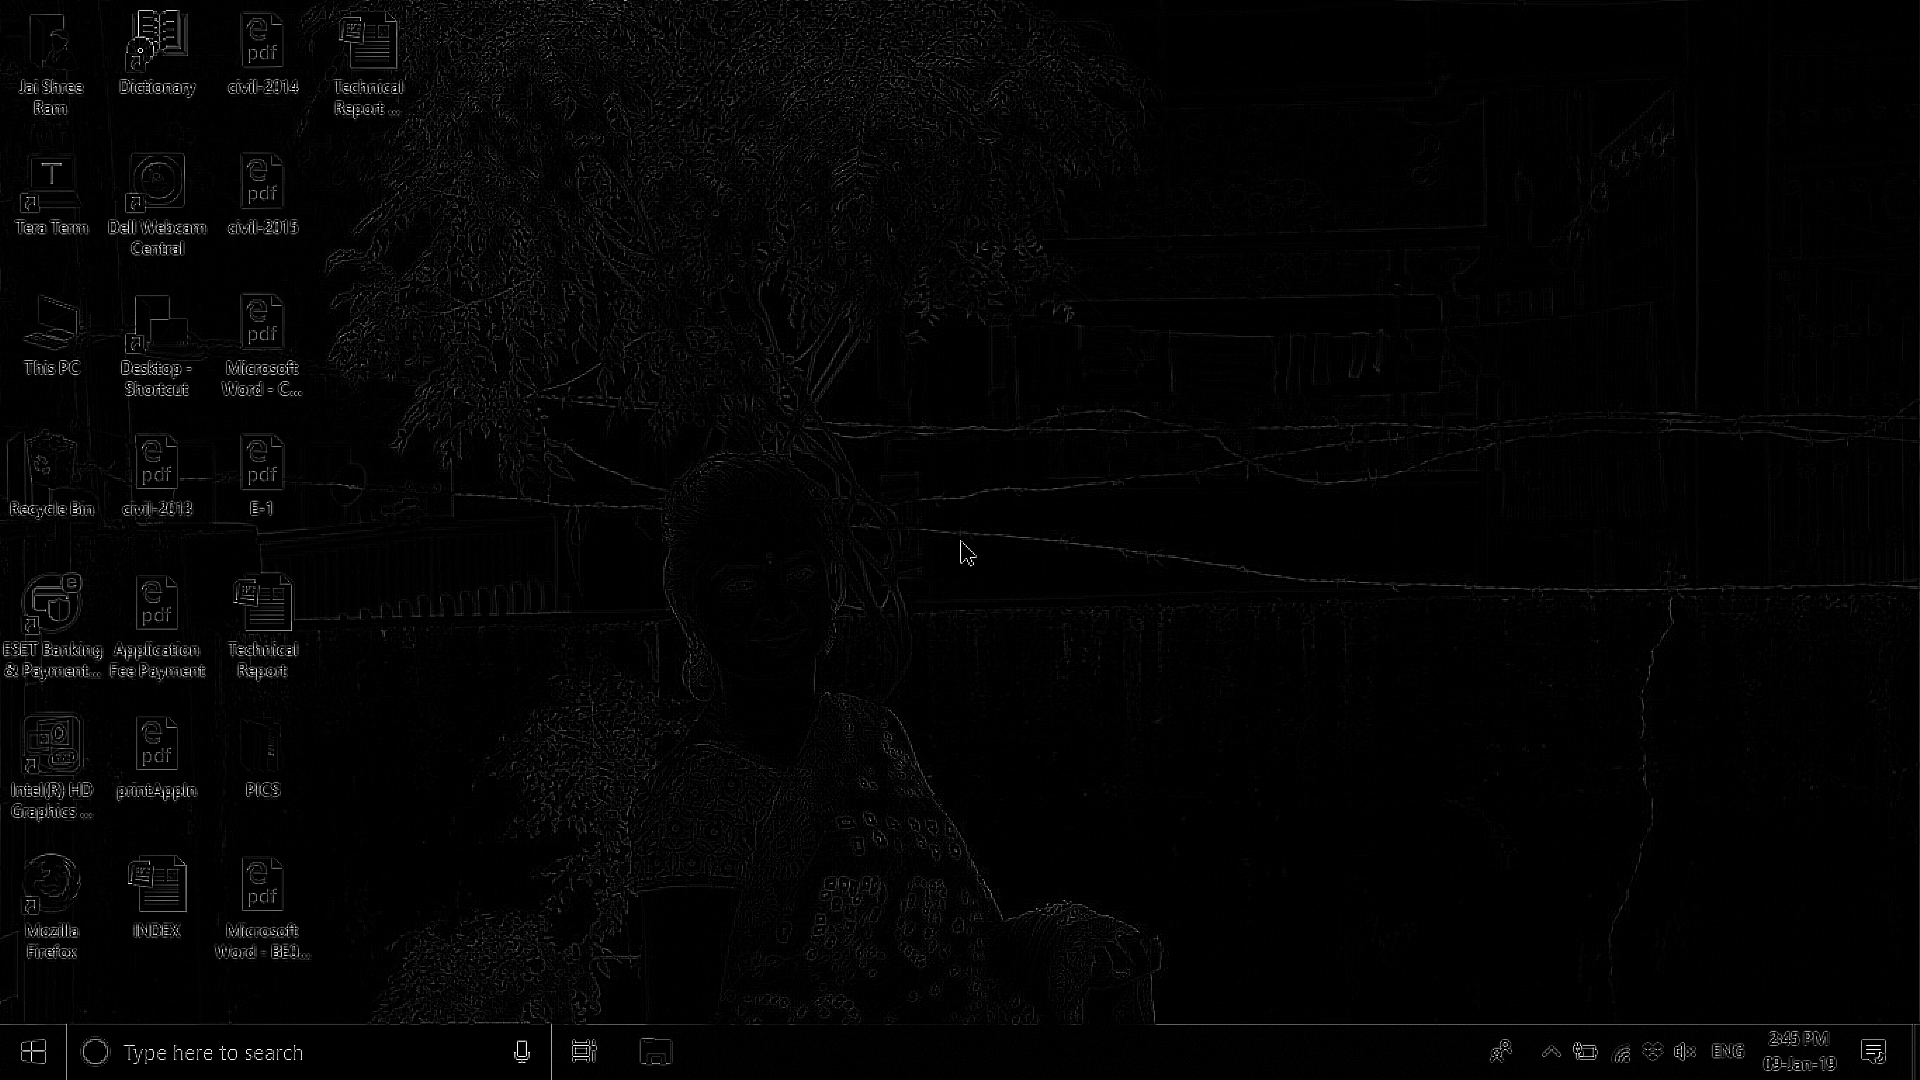

In [16]:

img = PIL.Image.fromarray(outframe)
img.save("/home/xilinx/jupyter_notebooks/base/video/data/opencv_filters.jpg")

img